# Comments on the Solution of Task 1 and Task 2

## Task 1

We noticed that the $x_1$ and $x_2$ values in the dataset range between $-1$ and $1$, since we know that the sigmoid activation function $\sigma(x) = \frac{1}{1 + e^{-x}}$ outputs exactly $0.5$ when the input is $0$, greater than $0.5$ for positive inputs, and less than $0.5$ for negative inputs. <br>

The approach was to determine the minimum values for $\alpha_0$, $\alpha_1$, and $\alpha_2$ that result in $\alpha_0 + \alpha_1 x_{i1} + \alpha_2 x_{i2} \geq 0$ for the points $(0,1)$ and $(-1,0)$ in order to be correctly segmented to class 1.<br>

Since the class 1 points lie along the positive $y$-axis and negative $x$-axis, the reasonable prediction was to choose a negative $\alpha_1$ and a positive $\alpha_2$, so that the weight $\alpha_1$ compensates for any negative $x_1$ input, resulting in a positive or zero output to be passed to the sigmoid activation function. <br>
Since $(0,0)$ needs to be classified in the class 0, $\alpha_0$ needs to be negative.

Based on the previous observations we assumed $\alpha_0 = -1$, $\alpha_1 = -1$, and $\alpha_2 = 1$. <br>
Validation test case $(-1,0)$: $\hat{y} = \sigma(-1 + (-1)(-1) + (1)(0)) = \sigma(-1 + 1) = \sigma(0)$, since $\sigma(0) = 0.5 \geq 0.5$, this successfully predicts class 1. <br>
After testing using the provided function: the previous weights and bias values resulted in correct classifications, but we adjusted them to achieve scores closer to $1$ for class 1 and closer to $0$ for class 0.

## Task 2
Similar approach was used in task 2, but this time we need to optimize for negative $y$-axis and positive $x$-axis, at the same time we need to exclude all the points that share the same $x_1 = 0$. <br>
The bias $\beta_0$ needs also to be negative to exclude the origin $(0,0)$ from classification $1$ <br>
$\beta_1$ needs to be positive since we are optimizing for positive $x-axis$ <br>
$\beta_2$ needs to be negative since we are optimizing for negative $y-axis$ <br>

Assumption: $\beta_0 = -1$, $\beta_1 = 1$, and $\beta_2 = -1$. <br>
Validation test case $(0,-1)$: $\hat{y} = \sigma(-1 + (1)(0) + (-1)(-1)) = \sigma(-1 + 1) = \sigma(0)$, since $\sigma(0) = 0.5 \geq 0.5$, this successfully predicts class 1. <br>
After testing using the provided function: the previous weights and bias values resulted in correct classifications, but we adjusted them to achieve scores closer to $1$ for class 1 and closer to $0$ for class 0.# Comments on the Solution of Task 1 and Task 2

## Imports

In [ ]:
%pip install torch matplotlib matplotlib-inline

import torch
from torch import Tensor

import matplotlib.pyplot as plt
from  matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

## Exercise 1 (5P)

Suppose you have five input points, $\textbf{x}_1=(0,0)^\top$, $\textbf{x}_2=(1,0)^\top$,
$\textbf{x}_3=(0,-1)^\top$, $\textbf{x}_4=(-1,0)^\top$ and $\textbf{x}_5=(0,1)^\top$, and
the corresponding classes are $y_1=y_2=y_3=0$ and $y_4=y_5=1$:

In [79]:
x = torch.tensor([
    [0, 0],
    [1, 0],
    [0, -1],
    [-1, 0],
    [0, 1]
])
y = torch.tensor([0, 0, 0, 1, 1])
labs = ['$x_1$', '$x_2$', '$x_3$', '$x_4$', '$x_5$']

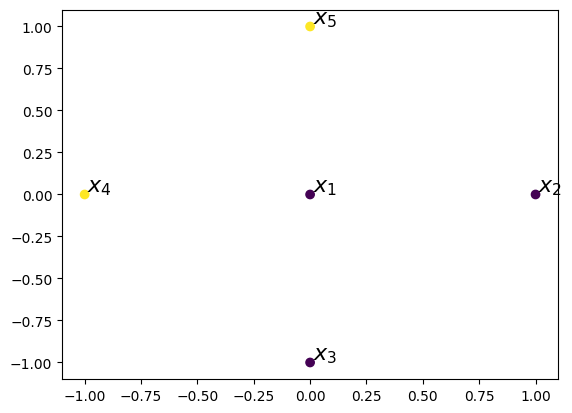

In [80]:
def plot_scatter(x: torch.tensor, y: torch.tensor, labs: torch.tensor) -> None:
    """Utility function to plot a scatter plot of the data"""
    # copy the input tensors to avoid modifying the original ones
    x = x.clone().detach().numpy()
    y = y.clone().detach().numpy()
    plt.scatter(x[:, 0], x[:, 1], c=y)
    for i, lab in enumerate(labs):
        plt.annotate(
            lab, (x[i, 0], x[i, 1]), size=16,
            xytext=(2, 2), textcoords='offset points'
        )
    plt.show()
    plt.close()

plot_scatter(x, y, labs)

Consider a logistic regression model
$\hat{y}_i=\sigma\left(\alpha_0+\alpha_1x_{i1}+\alpha_2x_{i2}\right)$, with
$\sigma(\cdot)$ the sigmoid function, $\sigma(x)=\left(1+e^{-x}\right)^{-1}$.
What values for $\alpha_0$, $\alpha_1$ and $\alpha_2$ would result in the correct
classification for this dataset? A positive label is predicted when the output of the
sigmoid is larger or equal than 0.5.

**Note**: do not use any formulas or automated methods to find the answer.
Think for yourself. A logistic regression classifier is nothing more than a hyper-plane
separating points of the two classes. If necessary, review vectors, dot-products and
their geometrical interpretation in linear algebra. This applies to the following
exercises, too.

We add a first column of ones, which is used for the 'bias'.

In [81]:
x_design = torch.cat([torch.ones(5, 1), x], dim=1)

In [89]:
a0 = -8

a1 = -16

a2 = 16

a = torch.tensor([a0, a1, a2], dtype=torch.float)

# We define a custom sigmoid function
def sigmoid(x: Tensor) -> Tensor:
    return 1 / (1 + torch.exp(-x))


# Calculate predictions
scores = sigmoid(x_design @ a)

# Let's investigate the obtained scores.
def print_scores(target: Tensor, scores: Tensor) -> None:
    print('\tTarget\tScore')
    [print('{}\t{}\t{:.3f}'.format('x' + str(i), int(t), float(s)))
     for i, (t, s) in enumerate(zip(target, scores), start=1)]

print_scores(y, scores)

	Target	Score
x1	0	0.000
x2	0	0.000
x3	0	0.000
x4	1	1.000
x5	1	1.000


You should make sure that the last two values are close to one and the others
are close to zero.

**Note:** There are many valid parametrization that lead to a separating hyperplane. How would you prioritize between them?


## Exercise 2 (5P)

Continuing from the previous exercise, suppose now that $y_2=y_3=1$ and $y_1=y_2=y_5=0$.

In [90]:
y = torch.tensor([0, 1, 1, 0, 0])

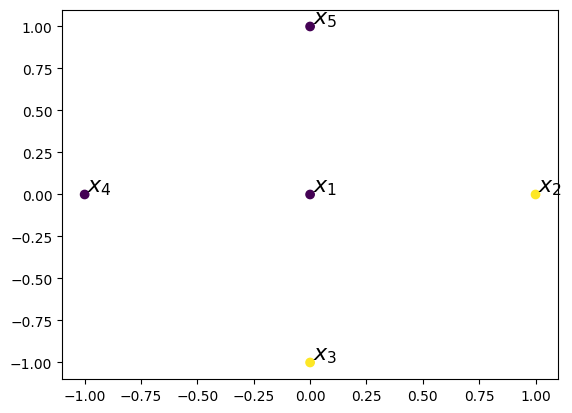

In [91]:
plot_scatter(x, y, labs)

Consider the same logistic regression model above with coefficients $\beta_0$, $\beta_1$
and $\beta_2$, how would you need to set these coefficients to correctly classify this
dataset?

In [97]:
b0 = -6

b1 = 13

b2 = -13

b = torch.tensor([b0, b1, b2], dtype=torch.float)

print_scores(y, sigmoid(x_design @ b))

	Target	Score
x1	0	0.002
x2	1	0.999
x3	1	0.999
x4	0	0.000
x5	0	0.000
